In [1]:
from keppy import Orbit, MU_EARTH

orbit = Orbit([2e6], mu=MU_EARTH)
print(orbit)

Orbit([a=2e+6, e=0, i=0, Ω=0, ω=0, θ=0], μ=3.99e+14, type='circular')


### Plot the rocky planets in 2d


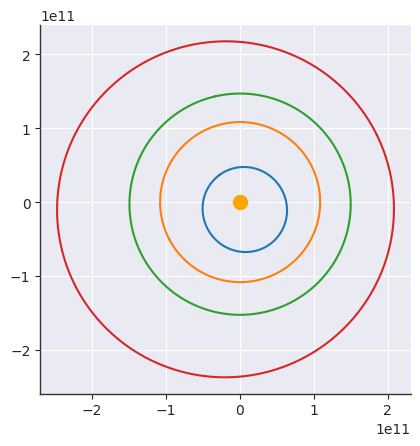

In [2]:
import matplotlib.pyplot as plt
from keppy import MERCURY, VENUS, EARTH, MARS

MERCURY.plot()
VENUS.plot()
EARTH.plot()
MARS.plot()

plt.scatter([0], [0], s=100, color="orange")

### Plot an orbit in 3d


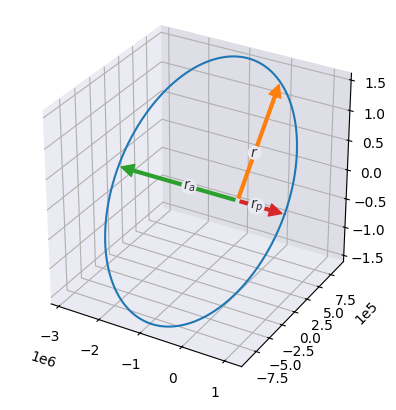

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keppy import Orbit, MU_EARTH

orbit = Orbit([2e6, 0.45, np.pi / 3, 0, 0, np.pi / 2], mu=MU_EARTH)

ax = plt.axes(projection="3d")
orbit.plot(show=["r", "r_p", "r_a"])

### Plot orbital elements in 3d


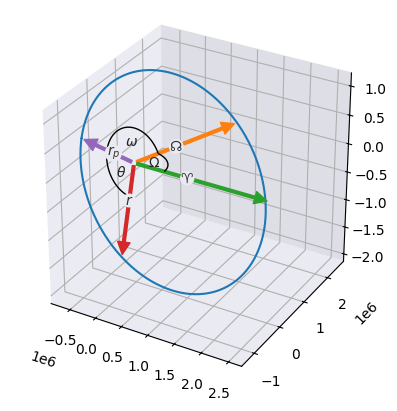

In [49]:
import matplotlib.pyplot as plt
from keppy import Orbit, MU_EARTH

orbit = Orbit([2e6, 0.45, np.pi / 3, np.pi / 2.5, np.pi * 0.8, np.pi / 2], mu=MU_EARTH)

ax = plt.axes(projection="3d")
orbit.plot(show=["r_p", "r", "theta", "n", "omega", "x", "Omega"])

### Visualize an orbit (requires plotly)


### Hohmann transfer from Earth to Mars


Δv1 = 2.94 km/s
Δv2 = 2.65 km/s
Total Δv = 5.59 km/s
Δt = 258.86 days


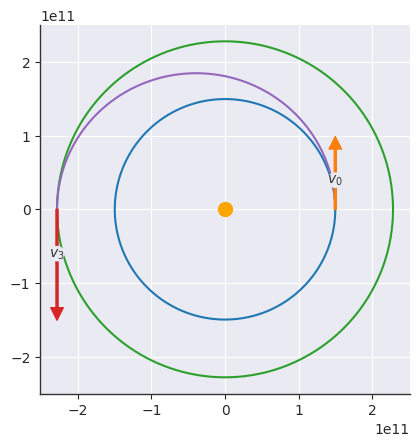

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from keppy import Orbit, EARTH, MARS, MU_SUN

earth = Orbit([EARTH.a], mu=MU_SUN).at_theta(0)
mars = Orbit([MARS.a], mu=MU_SUN).at_theta(np.pi)
transfer = earth.hohmann_transfer(mars)

# Note: the velocities are *not* drawn to scale! Only the direction is "correct"
earth.plot(show=["v"], labels={"v": "$v_0$"})
mars.plot(show=["v"], labels={"v": "$v_3$"})
transfer.plot(thetas=np.linspace(0, np.pi, 100))
plt.scatter([0], [0], s=100, color="orange")

v0 = earth.at_theta(0).v_vec
v1 = transfer.at_theta(0).v_vec
dv1 = np.linalg.norm(v1 - v0)
print(f"Δv1 = {dv1/1e3:.2f} km/s")

v2 = transfer.at_theta(np.pi).v_vec
v3 = mars.at_theta(np.pi).v_vec
dv2 = np.linalg.norm(v3 - v2)
print(f"Δv2 = {dv2/1e3:.2f} km/s")

dv = dv1 + dv2
print(f"Total Δv = {dv/1e3:.2f} km/s")

dt = transfer.at_theta(np.pi).t - transfer.at_theta(0).t
print(f"Δt = {dt/3600/24:.2f} days")

### Bielliptic (or double Hohmann) transfer from Earth to Mars


Δv1 = 5.35 km/s
Δv2 = 2.25 km/s
Δv3 = 2.30 km/s
Total Δv = 9.90 km/s


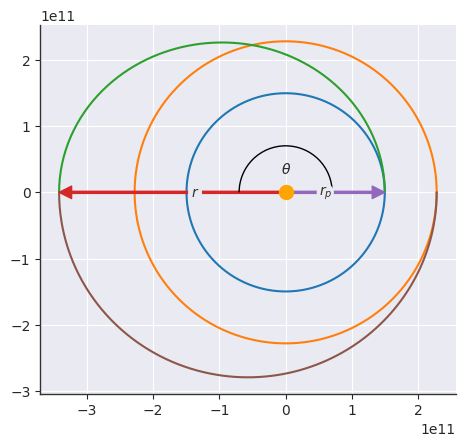

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from keppy import Orbit, EARTH, MARS, MU_SUN

earth = Orbit([EARTH.a], mu=MU_SUN).at_theta(0)
mars = Orbit([MARS.a], mu=MU_SUN).at_theta(np.pi)
[transfer1, transfer2] = earth.bielliptic_transfer(mars, ra=mars.ra * 1.5)

earth.plot()
mars.plot()
transfer1.plot(thetas=np.linspace(0, np.pi, 100), theta=np.pi, show=["r", "r_p", "theta"])
transfer2.plot(thetas=np.linspace(np.pi, 2 * np.pi, 100))
plt.scatter([0], [0], s=100, color="orange", zorder=3)

v0 = earth.at_theta(0).v_vec
v1 = transfer1.at_theta(0).v_vec
dv1 = np.linalg.norm(v1 - v0)
print(f"Δv1 = {dv1/1e3:.2f} km/s")

v2 = transfer1.at_theta(np.pi).v_vec
v3 = transfer2.at_theta(np.pi).v_vec
dv2 = np.linalg.norm(v3 - v2)
print(f"Δv2 = {dv2/1e3:.2f} km/s")

v4 = transfer2.at_theta(0).v_vec
v5 = mars.at_theta(2 * np.pi).v_vec
dv3 = np.linalg.norm(v5 - v4)
print(f"Δv3 = {dv3/1e3:.2f} km/s")

dv = dv1 + dv2 + dv3
print(f"Total Δv = {dv/1e3:.2f} km/s")

In [159]:
from itertools import product

ns = np.linspace(10, 18, 100)
ms = np.linspace(0, 100, 100)


def filter_nm(x):
    [n, m] = x

    if not m > n:
        return False

    if not (n > 1 and m > 1):
        return False

    Delta = (
        (m - 1) * np.sqrt(2 / (m * (m + 1)))
        - (n - 1) * np.sqrt(2 / (n * (n + 1)))
        + np.sqrt(2 * (n + m) / (n * m))
        - 2 * np.sqrt(1 / n)
    )

    if not np.isclose(Delta, 0, atol=1e-4):
        return False

    return True


mms = []
nns = []
dvs = []

for n, m in filter(filter_nm, product(ns, ms)):
    r1 = EARTH.a
    r2 = n * r1
    ra = m * r1

    orbit1 = Orbit([r1], MU_SUN)
    orbit2 = Orbit([r2], MU_SUN)
    [transfer1, transfer2] = orbit1.bielliptic_transfer(orbit2, ra=ra)

    v0 = orbit1.at_theta(0).v_vec
    v1 = transfer1.at_theta(0).v_vec
    dv1 = np.linalg.norm(v1 - v0)

    v2 = transfer1.at_theta(np.pi).v_vec
    v3 = transfer2.at_theta(np.pi).v_vec
    dv2 = np.linalg.norm(v3 - v2)

    v4 = transfer2.at_theta(0).v_vec
    v5 = orbit2.at_theta(2 * np.pi).v_vec
    dv3 = np.linalg.norm(v5 - v4)

    dv = dv1 + dv2 + dv3
    dvs.append(dv)
    mms.append(m)
    nns.append(n)
    # print(f"Total Δv = {dv/1e3:.2f} km/s")``

In [130]:
np.round(149597994866.2327)

149597994866.0

### General coplanar transfer


### Impulsive shot
